In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import os
import re
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,  Concatenate, Input, BatchNormalization
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras import Model
from keras.callbacks import ModelCheckpoint,EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# unzipping the folder

!unzip '/content/drive/MyDrive/MURA-v1.1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/XR_WRIST/patient08489/study1_negative/image3.png  
  inflating: train/XR_WRIST/patient08489/study1_negative/image4.png  
  inflating: train/XR_WRIST/patient08490/study1_negative/image1.png  
  inflating: train/XR_WRIST/patient08490/study1_negative/image2.png  
  inflating: train/XR_WRIST/patient08490/study1_negative/image3.png  
  inflating: train/XR_WRIST/patient08491/study1_negative/image1.png  
  inflating: train/XR_WRIST/patient08491/study1_negative/image2.png  
  inflating: train/XR_WRIST/patient08492/study1_negative/image1.png  
  inflating: train/XR_WRIST/patient08492/study1_negative/image2.png  
  inflating: train/XR_WRIST/patient08493/study1_negative/image1.png  
  inflating: train/XR_WRIST/patient08493/study1_negative/image2.png  
  inflating: train/XR_WRIST/patient08493/study1_negative/image3.png  
  inflating: train/XR_WRIST/patient08494/study1_negative/image1.png  
  inflating: train/XR_WRIST/patient0849

In [4]:
# checking for the file existence
!ls


drive	     train_image_paths.csv	valid_image_paths.csv
sample_data  train_labeled_studies.csv	valid_labeled_studies.csv
train	     valid


In [5]:
# Importing Data
train_path = pd.read_csv('/content/train_image_paths.csv', header=None, names=['paths'])
valid_path = pd.read_csv('/content/valid_image_paths.csv', header=None, names=['paths'])

In [6]:
train_path.head()

,paths
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


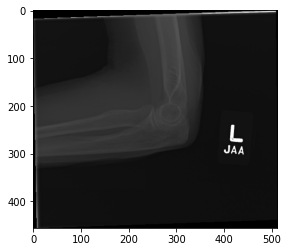

In [7]:
image = cv2.imread('/content/train/XR_ELBOW/patient00011/study1_negative/image1.png')
plt.imshow(image)

Text(0.5, 1.0, 'XR_WRIST')

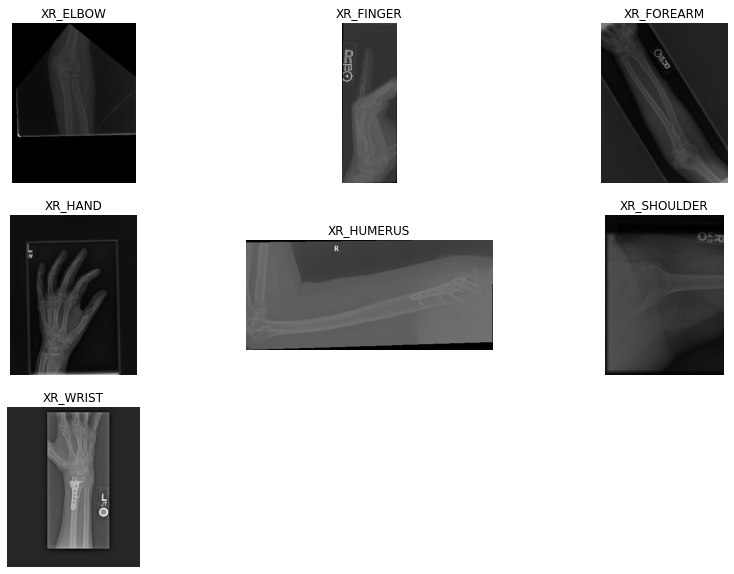

In [8]:
# code for displaying multiple images in one figure
  

  
# create figure
fig = plt.figure(figsize=(15, 10))
  
# setting values to rows and column variables
rows = 3
columns = 3
  
# reading images
Image1 = cv2.imread('/content/train/XR_ELBOW/patient00016/study1_positive/image1.png')
Image2 = cv2.imread('/content/train/XR_FINGER/patient00042/study1_positive/image1.png')
Image3 = cv2.imread('/content/train/XR_FOREARM/patient00063/study1_positive/image1.png')
Image4 = cv2.imread('/content/train/XR_HAND/patient00008/study1_positive/image1.png')
Image5 = cv2.imread('/content/train/XR_HUMERUS/patient00051/study1_positive/image1.png')
Image6 = cv2.imread('/content/train/XR_SHOULDER/patient00001/study1_positive/image1.png')
Image7 = cv2.imread('/content/train/XR_WRIST/patient00006/study1_positive/image1.png')
  
  
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("XR_ELBOW")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("XR_FINGER")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("XR_FOREARM")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("XR_HAND")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("XR_HUMERUS")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("XR_SHOULDER")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(Image7)
plt.axis('off')
plt.title("XR_WRIST")

**Data Preprocessing** 

**Train Data**

In [9]:
# Changing filename according to its present filepath.

pattern = 'MURA-v1.1'
replace = '/content'
path = []
for i in train_path['paths']:
    res = re.sub (pattern, replace,i)
    path.append(res)
len(path)

36808

In [10]:
# Adding path column to train_path dataframe and droping old 'paths' column.

train_path['path'] = path
train_path.head()


,paths,path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,/content/train/XR_SHOULDER/patient00001/study1...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,/content/train/XR_SHOULDER/patient00001/study1...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,/content/train/XR_SHOULDER/patient00001/study1...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,/content/train/XR_SHOULDER/patient00002/study1...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,/content/train/XR_SHOULDER/patient00002/study1...


In [11]:
# Droping old 'paths' column from dataframe

train_path.drop('paths', axis=1, inplace= True)
train_path.head()

,path
0,/content/train/XR_SHOULDER/patient00001/study1...
1,/content/train/XR_SHOULDER/patient00001/study1...
2,/content/train/XR_SHOULDER/patient00001/study1...
3,/content/train/XR_SHOULDER/patient00002/study1...
4,/content/train/XR_SHOULDER/patient00002/study1...


In [12]:
# Creating new column with the help of path column.

result = []
for i in train_path ['path']:
  res_1 = re.findall('positive', i)
  res_0 = re.findall('negative', i)
  result.extend(res_1)
  result.extend(res_0)

In [13]:
train_path['result']=result
train_path.head()

,path,result
0,/content/train/XR_SHOULDER/patient00001/study1...,positive
1,/content/train/XR_SHOULDER/patient00001/study1...,positive
2,/content/train/XR_SHOULDER/patient00001/study1...,positive
3,/content/train/XR_SHOULDER/patient00002/study1...,positive
4,/content/train/XR_SHOULDER/patient00002/study1...,positive


In [14]:
# Adding some column to dataframe for more clearity and for visualization.

train_path['region']= train_path['path'].apply(lambda x: x.split('/')[3])  
train_path['patientId']  = train_path['path'].apply(lambda x: x.split('/')[4].replace('patient',''))
train_path.head()

,path,result,region,patientId
0,/content/train/XR_SHOULDER/patient00001/study1...,positive,XR_SHOULDER,00001
1,/content/train/XR_SHOULDER/patient00001/study1...,positive,XR_SHOULDER,00001
2,/content/train/XR_SHOULDER/patient00001/study1...,positive,XR_SHOULDER,00001
3,/content/train/XR_SHOULDER/patient00002/study1...,positive,XR_SHOULDER,00002
4,/content/train/XR_SHOULDER/patient00002/study1...,positive,XR_SHOULDER,00002


In [15]:
# Checking minimum and maximum size of images in dataframe.

# size=[]
# for i in train_path['path']:
#   im = cv2.imread(i)
#   shape = im.shape
#   size.append(shape)



In [16]:
# train_path['size']=size
# train_path.head()

In [17]:
# minvalue = train_path['size'].min()
# maxvalue = train_path['size'].max()
# print(minvalue)
# print(maxvalue)

In [18]:
train_path = train_path[['path', 'region', 'patientId', 'result']]
train_path.head()

,path,region,patientId,result
0,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001,positive
1,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001,positive
2,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001,positive
3,/content/train/XR_SHOULDER/patient00002/study1...,XR_SHOULDER,00002,positive
4,/content/train/XR_SHOULDER/patient00002/study1...,XR_SHOULDER,00002,positive


**Validation Data**

In [19]:
# Changing the filename according to its present filepath

pattern = 'MURA-v1.1'
replace = '/content'
path = []
for i in valid_path['paths']:
  res = re.sub(pattern, replace, i)
  path.append(res)
len(path)

3197

In [20]:
# Adding path column to valid_path dataframe.
valid_path['path'] = path
valid_path.head()


,paths,path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,/content/valid/XR_WRIST/patient11185/study1_po...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,/content/valid/XR_WRIST/patient11185/study1_po...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,/content/valid/XR_WRIST/patient11185/study1_po...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,/content/valid/XR_WRIST/patient11185/study1_po...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,/content/valid/XR_WRIST/patient11186/study1_po...


In [21]:
# Droping old 'paths' column from dataframe.
valid_path.drop('paths',axis=1,inplace=True)
valid_path.head()

,path
0,/content/valid/XR_WRIST/patient11185/study1_po...
1,/content/valid/XR_WRIST/patient11185/study1_po...
2,/content/valid/XR_WRIST/patient11185/study1_po...
3,/content/valid/XR_WRIST/patient11185/study1_po...
4,/content/valid/XR_WRIST/patient11186/study1_po...


In [22]:
# Creating new column with the help of path column.

result = []
for i in valid_path ['path']:
  res_1 = re.findall('positive', i)
  res_0 = re.findall('negative', i)
  result.extend(res_1)
  result.extend(res_0)

In [23]:
valid_path['result']=result
valid_path

,path,result
0,/content/valid/XR_WRIST/patient11185/study1_po...,positive
1,/content/valid/XR_WRIST/patient11185/study1_po...,positive
2,/content/valid/XR_WRIST/patient11185/study1_po...,positive
3,/content/valid/XR_WRIST/patient11185/study1_po...,positive
4,/content/valid/XR_WRIST/patient11186/study1_po...,positive
...,...,...
3192,/content/valid/XR_FINGER/patient11967/study1_n...,negative
3193,/content/valid/XR_FINGER/patient11967/study1_n...,negative
3194,/content/valid/XR_FINGER/patient11738/study1_n...,negative
3195,/content/valid/XR_FINGER/patient11738/study1_n...,negative


In [24]:
# Adding some column to dataframe for more clearity and for visualization.

valid_path['region']= valid_path['path'].apply(lambda x: x.split('/')[3])  
valid_path['patientId']  = valid_path['path'].apply(lambda x: x.split('/')[4].replace('patient',''))
valid_path.head()

,path,result,region,patientId
0,/content/valid/XR_WRIST/patient11185/study1_po...,positive,XR_WRIST,11185
1,/content/valid/XR_WRIST/patient11185/study1_po...,positive,XR_WRIST,11185
2,/content/valid/XR_WRIST/patient11185/study1_po...,positive,XR_WRIST,11185
3,/content/valid/XR_WRIST/patient11185/study1_po...,positive,XR_WRIST,11185
4,/content/valid/XR_WRIST/patient11186/study1_po...,positive,XR_WRIST,11186


In [25]:
valid_path = valid_path[['path', 'region', 'patientId', 'result']]
valid_path.head()

,path,region,patientId,result
0,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185,positive
1,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185,positive
2,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185,positive
3,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185,positive
4,/content/valid/XR_WRIST/patient11186/study1_po...,XR_WRIST,11186,positive


**Visualization**

**Training Data**

In [ ]:
train_path.shape

(36808, 4)

In [ ]:
train_path['patientId'].nunique()

11184

In [ ]:
train_path['result'].value_counts()

negative    21935
positive    14873
Name: result, dtype: int64

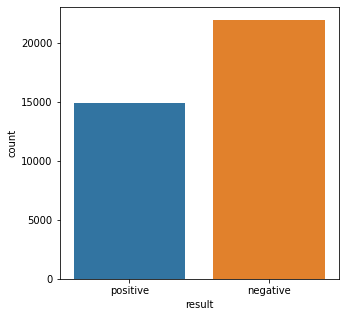

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=train_path['result'], data=train_path)

In [ ]:
train_path['region'].value_counts()

XR_WRIST       9752
XR_SHOULDER    8379
XR_HAND        5543
XR_FINGER      5106
XR_ELBOW       4931
XR_FOREARM     1825
XR_HUMERUS     1272
Name: region, dtype: int64

In [ ]:
Region = train_path['region'].unique()
Count = train_path['region'].value_counts()
fig = px.bar(train_path, x=Region, y=Count, title="Number of Images from each Region in Training Set")
fig.show()

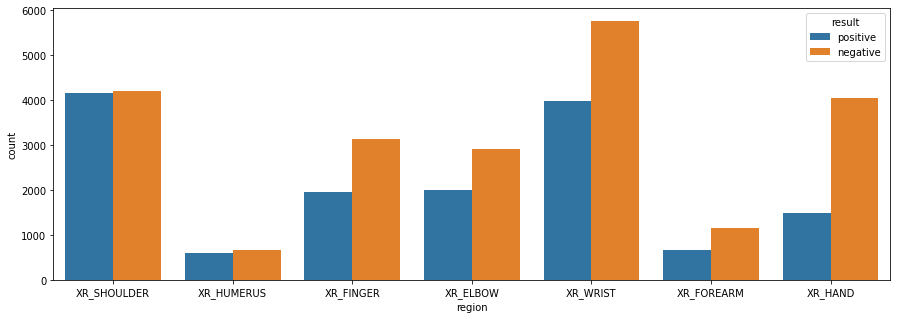

In [ ]:
# count plot on single categorical variable
plt.figure(figsize=(15,5))
sns.countplot(x =train_path['region'], data = train_path, hue=train_path['result'], orient='horizontal')
 
# Show the plot
plt.show()


In [ ]:
#  Droping size, region and patientId columns from dataframe.

# train_path.drop(['region','patientId'],axis=1,inplace=True)
# train_path.head()


,path,result
0,/content/train/XR_SHOULDER/patient00001/study1...,positive
1,/content/train/XR_SHOULDER/patient00001/study1...,positive
2,/content/train/XR_SHOULDER/patient00001/study1...,positive
3,/content/train/XR_SHOULDER/patient00002/study1...,positive
4,/content/train/XR_SHOULDER/patient00002/study1...,positive


**Validation Data**

In [ ]:
valid_path.shape


(3197, 4)

In [ ]:
valid_path['patientId'].nunique()

783

In [ ]:
valid_path['result'].value_counts()


negative    1667
positive    1530
Name: result, dtype: int64

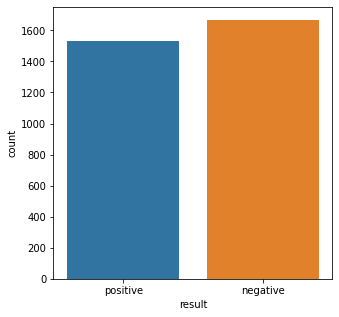

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=valid_path['result'], data=valid_path)

In [ ]:
valid_path['region'].value_counts()

XR_WRIST       659
XR_SHOULDER    563
XR_ELBOW       465
XR_FINGER      461
XR_HAND        460
XR_FOREARM     301
XR_HUMERUS     288
Name: region, dtype: int64

In [ ]:
Region = valid_path['region'].unique()
Count = valid_path['region'].value_counts()
fig = px.bar(valid_path, x=Region, y=Count, title="Number of Images from each Region in Vaalidation Set")
fig.show()

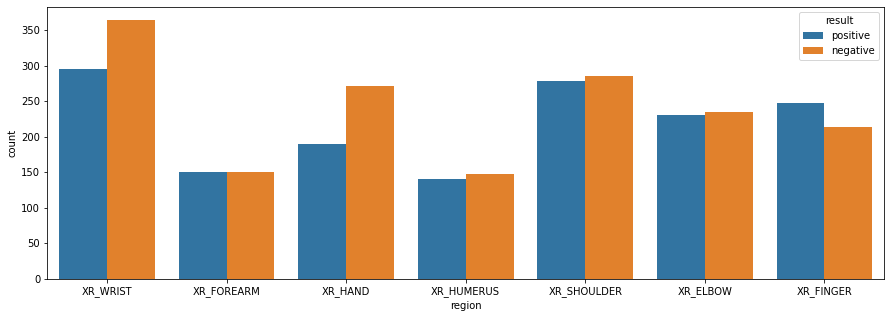

In [ ]:
# count plot on single categorical variable
plt.figure(figsize=(15,5))
sns.countplot(x = valid_path['region'], data = valid_path, hue= valid_path['result'], orient='horizontal')
 
# Show the plot
plt.show()


In [ ]:
#  Droping size, region and patientId columns from dataframe.

# valid_path.drop(['region','patientId'],axis=1,inplace=True)
# valid_path.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,path,result
0,/content/valid/XR_WRIST/patient11185/study1_po...,positive
1,/content/valid/XR_WRIST/patient11185/study1_po...,positive
2,/content/valid/XR_WRIST/patient11185/study1_po...,positive
3,/content/valid/XR_WRIST/patient11185/study1_po...,positive
4,/content/valid/XR_WRIST/patient11186/study1_po...,positive


In [ ]:
# Saving the train and test data as csv file in colab for furter use.

train_path.to_csv('/content/drive/MyDrive/MURA_ALL_train.csv') 
valid_path.to_csv('/content/drive/MyDrive/MURA_ALL_valid.csv')


**Treating Imbance Data**

In [26]:
train_path

,path,region,patientId,result
0,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001,positive
1,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001,positive
2,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001,positive
3,/content/train/XR_SHOULDER/patient00002/study1...,XR_SHOULDER,00002,positive
4,/content/train/XR_SHOULDER/patient00002/study1...,XR_SHOULDER,00002,positive
...,...,...,...,...
36803,/content/train/XR_HAND/patient11183/study1_neg...,XR_HAND,11183,negative
36804,/content/train/XR_HAND/patient11183/study1_neg...,XR_HAND,11183,negative
36805,/content/train/XR_HAND/patient11184/study1_neg...,XR_HAND,11184,negative
36806,/content/train/XR_HAND/patient11184/study1_neg...,XR_HAND,11184,negative


In [27]:
 X_train = train_path[['path', 'region','patientId']]
 X_train
 

,path,region,patientId
0,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001
1,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001
2,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001
3,/content/train/XR_SHOULDER/patient00002/study1...,XR_SHOULDER,00002
4,/content/train/XR_SHOULDER/patient00002/study1...,XR_SHOULDER,00002
...,...,...,...
36803,/content/train/XR_HAND/patient11183/study1_neg...,XR_HAND,11183
36804,/content/train/XR_HAND/patient11183/study1_neg...,XR_HAND,11183
36805,/content/train/XR_HAND/patient11184/study1_neg...,XR_HAND,11184
36806,/content/train/XR_HAND/patient11184/study1_neg...,XR_HAND,11184


In [28]:
Y_train= train_path['result']

In [29]:
normal = train_path[train_path['result']=='negative']

abnormal = train_path[train_path['result']=='positive']

In [30]:
print(normal.shape,abnormal.shape)

(21935, 4) (14873, 4)


In [31]:
# Importing dependency for Over Sampling

from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [32]:
pip install six

In [33]:
os =  RandomOverSampler(ratio=1)


In [34]:
X_train_res, Y_train_res = os.fit_sample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [35]:

X_train_res.shape,Y_train_res.shape

((43870, 3), (43870,))

In [36]:

df1 = pd.DataFrame(Y_train_res, columns=['result'])
df2 = pd.DataFrame(X_train_res, columns=['path', 'region', 'patientId'])



In [37]:
train_path= pd.concat([df2,df1], axis=1)

In [38]:
train_path

,path,region,patientId,result
0,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001,positive
1,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001,positive
2,/content/train/XR_SHOULDER/patient00001/study1...,XR_SHOULDER,00001,positive
3,/content/train/XR_SHOULDER/patient00002/study1...,XR_SHOULDER,00002,positive
4,/content/train/XR_SHOULDER/patient00002/study1...,XR_SHOULDER,00002,positive
...,...,...,...,...
43865,/content/train/XR_WRIST/patient07357/study1_po...,XR_WRIST,07357,positive
43866,/content/train/XR_SHOULDER/patient00244/study1...,XR_SHOULDER,00244,positive
43867,/content/train/XR_HAND/patient09961/study1_pos...,XR_HAND,09961,positive
43868,/content/train/XR_WRIST/patient07353/study1_po...,XR_WRIST,07353,positive


In [39]:
# Droping size, region and patientId columns from dataframe.

train_path.drop(['region','patientId'],axis=1,inplace=True)
train_path.head()


,path,result
0,/content/train/XR_SHOULDER/patient00001/study1...,positive
1,/content/train/XR_SHOULDER/patient00001/study1...,positive
2,/content/train/XR_SHOULDER/patient00001/study1...,positive
3,/content/train/XR_SHOULDER/patient00002/study1...,positive
4,/content/train/XR_SHOULDER/patient00002/study1...,positive


In [40]:
train_path.shape

(43870, 2)

In [41]:
valid_path

,path,region,patientId,result
0,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185,positive
1,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185,positive
2,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185,positive
3,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185,positive
4,/content/valid/XR_WRIST/patient11186/study1_po...,XR_WRIST,11186,positive
...,...,...,...,...
3192,/content/valid/XR_FINGER/patient11967/study1_n...,XR_FINGER,11967,negative
3193,/content/valid/XR_FINGER/patient11967/study1_n...,XR_FINGER,11967,negative
3194,/content/valid/XR_FINGER/patient11738/study1_n...,XR_FINGER,11738,negative
3195,/content/valid/XR_FINGER/patient11738/study1_n...,XR_FINGER,11738,negative


In [42]:
X_valid = valid_path[['path', 'region','patientId']]
X_valid

,path,region,patientId
0,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185
1,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185
2,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185
3,/content/valid/XR_WRIST/patient11185/study1_po...,XR_WRIST,11185
4,/content/valid/XR_WRIST/patient11186/study1_po...,XR_WRIST,11186
...,...,...,...
3192,/content/valid/XR_FINGER/patient11967/study1_n...,XR_FINGER,11967
3193,/content/valid/XR_FINGER/patient11967/study1_n...,XR_FINGER,11967
3194,/content/valid/XR_FINGER/patient11738/study1_n...,XR_FINGER,11738
3195,/content/valid/XR_FINGER/patient11738/study1_n...,XR_FINGER,11738


In [43]:
Y_valid= valid_path['result']
Y_valid

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
3192    negative
3193    negative
3194    negative
3195    negative
3196    negative
Name: result, Length: 3197, dtype: object

In [44]:
normal = valid_path[valid_path['result']=='negative']

abnormal = valid_path[valid_path['result']=='positive']

In [45]:
print(normal.shape,abnormal.shape)

(1667, 4) (1530, 4)


In [46]:
X_valid_res, Y_valid_res = os.fit_sample(X_valid, Y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [47]:
X_valid_res.shape,Y_valid_res.shape

((3334, 3), (3334,))

In [48]:
df1 = pd.DataFrame(Y_valid_res, columns=['result'])
df2 = pd.DataFrame(X_valid_res, columns=['path', 'region', 'patientId'])


In [49]:
valid_path= pd.concat([df2,df1], axis=1)

In [50]:
# Droping size, region and patientId columns from dataframe.

valid_path.drop(['region','patientId'],axis=1,inplace=True)
valid_path.head()


,path,result
0,/content/valid/XR_WRIST/patient11185/study1_po...,positive
1,/content/valid/XR_WRIST/patient11185/study1_po...,positive
2,/content/valid/XR_WRIST/patient11185/study1_po...,positive
3,/content/valid/XR_WRIST/patient11185/study1_po...,positive
4,/content/valid/XR_WRIST/patient11186/study1_po...,positive


In [51]:
valid_path.shape

(3334, 2)

**Data Agumentation(Grayscale)**

In [52]:
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2,
                                   vertical_flip=True, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255)

In [53]:
train_set = train_datagen.flow_from_dataframe(train_path,
                                              x_col='path',
                                              y_col='result',
                                              target_size=(85,85), 
                                              class_mode='binary',
                                              batch_size=32,
                                              color_mode='grayscale')

Found 43870 validated image filenames belonging to 2 classes.


In [54]:
valid_set = valid_datagen.flow_from_dataframe(valid_path,
                                              x_col='path',
                                              y_col='result',
                                              target_size=(85,85), 
                                              class_mode='binary',
                                              batch_size=32,
                                              color_mode='grayscale')

Found 3334 validated image filenames belonging to 2 classes.


**Building CNN Model**

In [ ]:
# Model Building

model = Sequential()

model.add(Conv2D(input_shape=(90,90,1), filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Flatten())

model.add(Dense(units=1024, activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))

model.add(Dense(units=1024, activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid', kernel_initializer='random_uniform'))

In [ ]:
# Model Compiling


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 90, 90, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 45, 45, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 23, 23, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 12, 12, 512)       1

In [ ]:
history = model.fit(train_set, validation_data=valid_set, epochs=15, shuffle=True, batch_size=256)

Epoch 1/15
1151/1151 [==============================] - 164s 141ms/step - loss: 0.6737 - accuracy: 0.5903 - val_loss: 0.6909 - val_accuracy: 0.5308
Epoch 2/15
1151/1151 [==============================] - 158s 138ms/step - loss: 0.6614 - accuracy: 0.5987 - val_loss: 0.6634 - val_accuracy: 0.5521
Epoch 3/15
1151/1151 [==============================] - 159s 138ms/step - loss: 0.6529 - accuracy: 0.6007 - val_loss: 0.6792 - val_accuracy: 0.5471
Epoch 4/15
1151/1151 [==============================] - 159s 138ms/step - loss: 0.6461 - accuracy: 0.6117 - val_loss: 0.6744 - val_accuracy: 0.5521
Epoch 5/15
1151/1151 [==============================] - 160s 139ms/step - loss: 0.6434 - accuracy: 0.6123 - val_loss: 0.6706 - val_accuracy: 0.5599
Epoch 6/15
1151/1151 [==============================] - 160s 139ms/step - loss: 0.6399 - accuracy: 0.6160 - val_loss: 0.6667 - val_accuracy: 0.5574
Epoch 7/15
1151/1151 [==============================] - 160s 139ms/step - loss: 0.6384 - accuracy: 0.6222 - val_

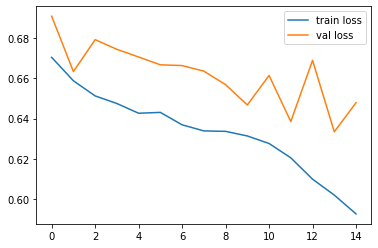

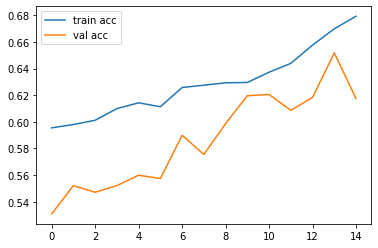

In [ ]:
#loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

**Data Agumentation(Color)**

In [55]:
train_datagen1 = ImageDataGenerator(rescale=1/255, rotation_range=20,
                                    shear_range=0.2, zoom_range=0.2,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    vertical_flip=True, horizontal_flip=True)
valid_datagen1 = ImageDataGenerator(rescale=1/255)

In [56]:
train_set1 = train_datagen1.flow_from_dataframe (train_path,
                                              x_col='path',
                                              y_col='result',
                                              target_size=(132,132), 
                                              class_mode='binary',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle=True)

Found 43870 validated image filenames belonging to 2 classes.


In [57]:
valid_set1 = valid_datagen1.flow_from_dataframe(valid_path,
                                              x_col='path',
                                              y_col='result',
                                              target_size=(132,132), 
                                              class_mode='binary',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle=True)

Found 3334 validated image filenames belonging to 2 classes.


**Building Model(Color)**

In [ ]:
# Model Building

model1 = Sequential()

model1.add(Conv2D(input_shape=(132,132,3), filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model1.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model1.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model1.add(Flatten())

model1.add(Dense(units=1024, activation='relu', kernel_initializer='random_uniform'))
model1.add(Dropout(0.2))

model1.add(Dense(units=1024, activation='relu', kernel_initializer='random_uniform'))
model1.add(Dropout(0.2))

model1.add(Dense(units=1, activation='sigmoid', kernel_initializer='random_uniform'))

In [ ]:
# Model Compiling


model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 132, 132, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 66, 66, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 17, 512)      

In [ ]:
history = model1.fit(train_set1, validation_data=valid_set1, epochs=15, shuffle=True, batch_size=256)

Epoch 1/15
1151/1151 [==============================] - 335s 290ms/step - loss: 0.6760 - accuracy: 0.5933 - val_loss: 0.6893 - val_accuracy: 0.5324
Epoch 2/15
1151/1151 [==============================] - 337s 293ms/step - loss: 0.6722 - accuracy: 0.5949 - val_loss: 0.6984 - val_accuracy: 0.5214
Epoch 3/15
1151/1151 [==============================] - 334s 290ms/step - loss: 0.6650 - accuracy: 0.5945 - val_loss: 0.6764 - val_accuracy: 0.5330
Epoch 4/15
1151/1151 [==============================] - 333s 289ms/step - loss: 0.6532 - accuracy: 0.6028 - val_loss: 0.6748 - val_accuracy: 0.5558
Epoch 5/15
1151/1151 [==============================] - 323s 281ms/step - loss: 0.6479 - accuracy: 0.6051 - val_loss: 0.6693 - val_accuracy: 0.5705
Epoch 6/15
1151/1151 [==============================] - 324s 281ms/step - loss: 0.6410 - accuracy: 0.6214 - val_loss: 0.6732 - val_accuracy: 0.5474
Epoch 7/15
1151/1151 [==============================] - 321s 279ms/step - loss: 0.6362 - accuracy: 0.6282 - val_

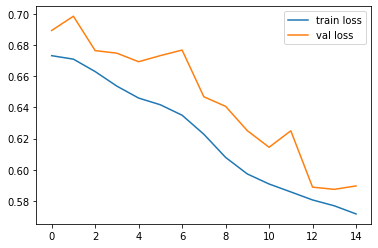

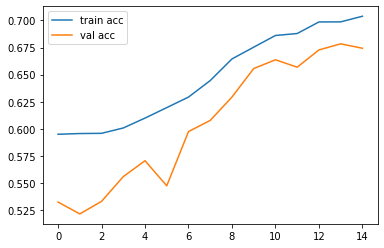

In [ ]:
#loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model1.save('/content/drive/MyDrive/cnn_model.h5')

**InceptionV3**

In [ ]:
# inc_train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# inc_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [58]:
inc_train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

inc_test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [59]:
inc_train_set = inc_train_datagen.flow_from_dataframe(train_path,
                                              x_col='path',
                                              y_col='result',
                                              target_size=(224, 224), 
                                              class_mode='binary',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle=True)
inc_valid_set = inc_test_datagen.flow_from_dataframe(valid_path,
                                              x_col='path',
                                              y_col='result',
                                              target_size=(224, 224), 
                                              class_mode='binary',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle=True)

Found 43870 validated image filenames belonging to 2 classes.
Found 3334 validated image filenames belonging to 2 classes.


In [ ]:
inc_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(224,224,3))

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inc_model.layers:
  layer.trainable = False

In [ ]:
x_inc = inc_model.output
x_inc = Flatten()(x_inc)
#x_inc= BatchNormalization()(x_inc)
#x_inc= Dropout(0.4)(x_inc)
x_inc = Dense(1024, activation='relu')(x_inc)
#x_inc= Dense(512,activation='relu')(x_inc)
#x_inc= BatchNormalization()(x_inc)
x_inc = Dropout(0.4)(x_inc)
output = Dense(1,activation='sigmoid')(x_inc)
model_incep = Model(inputs=inc_model.input, outputs=output)


In [ ]:
model_incep.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model_incep.fit(inc_train_set, validation_data=inc_valid_set, shuffle=True, epochs=15, batch_size=256)

Epoch 1/15
1371/1371 [==============================] - 683s 472ms/step - loss: 3.7128 - accuracy: 0.5963 - val_loss: 0.6245 - val_accuracy: 0.6338
Epoch 2/15
1371/1371 [==============================] - 599s 437ms/step - loss: 0.6331 - accuracy: 0.6265 - val_loss: 0.6013 - val_accuracy: 0.6542
Epoch 3/15
1371/1371 [==============================] - 600s 437ms/step - loss: 0.6269 - accuracy: 0.6385 - val_loss: 0.5914 - val_accuracy: 0.6641
Epoch 4/15
1371/1371 [==============================] - 597s 436ms/step - loss: 0.6172 - accuracy: 0.6531 - val_loss: 0.5873 - val_accuracy: 0.6674
Epoch 5/15
1371/1371 [==============================] - 600s 438ms/step - loss: 0.6172 - accuracy: 0.6428 - val_loss: 0.5803 - val_accuracy: 0.6836
Epoch 6/15
1371/1371 [==============================] - 599s 437ms/step - loss: 0.6215 - accuracy: 0.6438 - val_loss: 0.5840 - val_accuracy: 0.6710
Epoch 7/15
1371/1371 [==============================] - 600s 437ms/step - loss: 0.6110 - accuracy: 0.6543 - val_

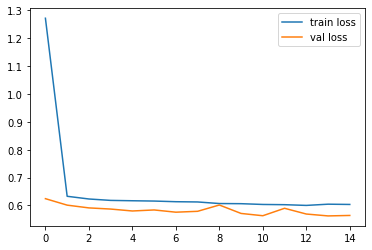

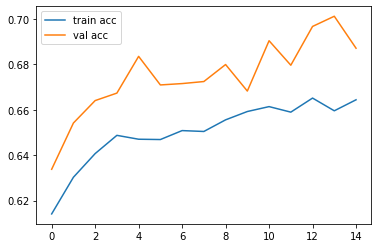

In [ ]:
#loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model_incep.save('/content/drive/MyDrive/best_incp.h5')

**Model Evaluation**

**Confusion Matrix**

**CNN(color)**

In [ ]:
Y_pred = model1.predict(valid_set1)
df = Y_pred

decision_teshold = 0.5
predict =[]

for i in df:
    if i<decision_teshold:
        predict.append(0)
    else:
        predict.append(1)

print('Confusion Matrix')
cf_matrix = (confusion_matrix(valid_set1.classes, predict))
print(cf_matrix)

Confusion Matrix
[[1179  488]
 [1077  453]]


**CNN(Gray)**

In [62]:

model1 =load_model('/content/drive/MyDrive/MURA/CNN_MODEL.h5')          # with size 88mb
model2 =load_model('/content/drive/MyDrive/MURA/CNN_MODEL1.h5')          # with size 44mb

In [ ]:
Y_pred1 = model1.predict(valid_set)
df = Y_pred1

decision_teshold = 0.5
predict1 =[]

for i in df:
    if i<decision_teshold:
        predict1.append(0)
    else:
        predict1.append(1)

print('Confusion Matrix Foe Model 1')
cf_matrix = (confusion_matrix(valid_set.classes, predict1))
print(cf_matrix)

Confusion Matrix Foe Model 1
[[1147  520]
 [1007  523]]


In [ ]:
Y_pred2 = model2.predict(valid_set)
df = Y_pred2

decision_teshold = 0.5
predict2 =[]

for i in df:
    if i<decision_teshold:
        predict2.append(0)
    else:
        predict2.append(1)

print('Confusion Matrix For Model 2')
cf_matrix = (confusion_matrix(valid_set.classes, predict2))
print(cf_matrix)

Confusion Matrix For Model 2
[[1150  517]
 [1045  485]]


**Prediction**

In [66]:
import tensorflow as tf
from keras_preprocessing import image
images = image.load_img("/content/train/XR_ELBOW/patient00011/study1_negative/image1.png", target_size=(85, 85))    
test_image = image.img_to_array(images)
test_image= tf.image.rgb_to_grayscale(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image/255.0

In [68]:
prediction = model1.predict(test_image)
prediction

array([[0.21664749]], dtype=float32)

In [69]:
output = prediction[0][0]
if output>0.5:
    state='Abnornality detected'
    print(state)
else:
    state='Abnormality not detected'
    print(state)

Abnormality not detected
